# AR

In [1]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Wczytajmy dane

In [2]:
series = Series.from_csv('./daily-minimum-temperatures.csv', header=0)
series.head()

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

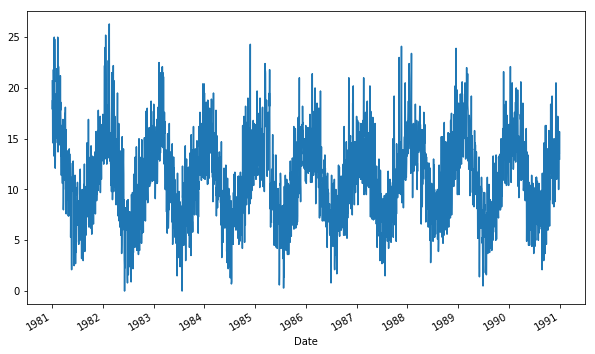

In [3]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

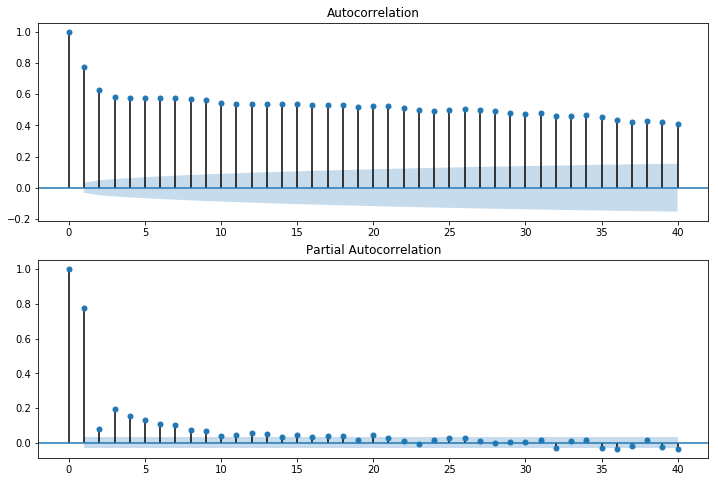

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series.values, lags=40, ax=ax2)
plt.show()

# Zadanie
Podzielmy zbiór na dane testowe i treningowe.

In [5]:
from statsmodels.tsa.ar_model import AR

In [6]:
X = series.values
train, test = X[1:len(X)-20], X[len(X)-21:]

In [7]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
rng1 =pd.date_range(series.index[5], periods=len(X)-21, freq='D')
trainS=pd.Series(train, index=rng1)
rng2 =pd.date_range(series.index[len(X)-21], periods=21, freq='D')
testS=pd.Series(test,index=rng2)
print(rng1)
print(rng2)

DatetimeIndex(['1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09',
               '1981-01-10', '1981-01-11', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '1990-12-01', '1990-12-02', '1990-12-03', '1990-12-04',
               '1990-12-05', '1990-12-06', '1990-12-07', '1990-12-08',
               '1990-12-09', '1990-12-10'],
              dtype='datetime64[ns]', length=3626, freq='D')
DatetimeIndex(['1990-12-11', '1990-12-12', '1990-12-13', '1990-12-14',
               '1990-12-15', '1990-12-16', '1990-12-17', '1990-12-18',
               '1990-12-19', '1990-12-20', '1990-12-21', '1990-12-22',
               '1990-12-23', '1990-12-24', '1990-12-25', '1990-12-26',
               '1990-12-27', '1990-12-28', '1990-12-29', '1990-12-30',
               '1990-12-31'],
              dtype='datetime64[ns]', freq='D')


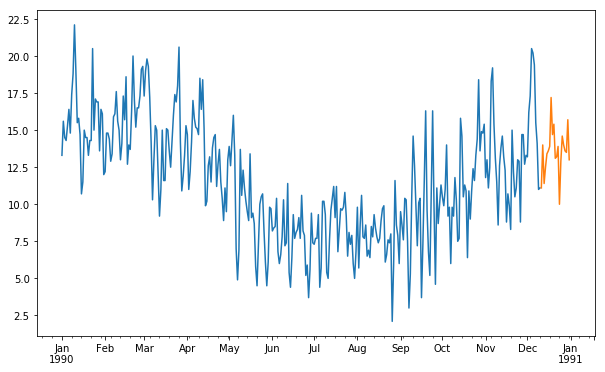

In [10]:
plt.figure(figsize=(10,6));
trainS.loc['1990':].plot()
testS.plot()
plt.show()

In [11]:
print(len(train))
print(len(test))

3626
21


# Zadanie
Naucz model AR

In [12]:
model = AR(train)

In [13]:
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 29
Coefficients: [ 0.55738754  0.58762852 -0.0931058   0.05046106  0.03987033  0.04131002
  0.02491994  0.04445767  0.01524968  0.03478189  0.0011222   0.00360734
  0.01653025  0.02384357  0.00169355  0.02644537  0.00776007  0.0106332
  0.03407186 -0.00931761  0.02435469  0.01939238  0.01405832 -0.01661921
 -0.00225734  0.01338266  0.0208978   0.0086036   0.00291673  0.002754  ]


In [14]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

In [15]:
from sklearn.metrics import mean_squared_error
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=12.913377, expected=11.100000
predicted=13.767165, expected=14.000000
predicted=13.726978, expected=11.400000
predicted=13.318208, expected=12.500000
predicted=13.437457, expected=13.400000
predicted=13.378645, expected=13.600000
predicted=13.381783, expected=13.900000
predicted=13.450244, expected=17.200000
predicted=13.702877, expected=14.700000
predicted=13.832890, expected=15.400000
predicted=13.756257, expected=13.100000
predicted=13.742452, expected=13.200000
predicted=13.831382, expected=13.900000
predicted=13.953424, expected=10.000000
predicted=13.878253, expected=12.900000
predicted=13.842488, expected=14.600000
predicted=13.651800, expected=14.000000
predicted=13.562829, expected=13.600000
predicted=13.541169, expected=13.500000
predicted=13.610657, expected=15.700000
predicted=13.692882, expected=13.000000
Test MSE: 2.386


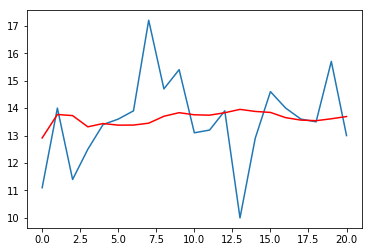

In [16]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Zadanie 
Wykonaj analogiczne zadanie w <tt>pandas</tt>.

In [17]:
model = AR(trainS)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 29
Coefficients: [ 0.55738754  0.58762852 -0.0931058   0.05046106  0.03987033  0.04131002
  0.02491994  0.04445767  0.01524968  0.03478189  0.0011222   0.00360734
  0.01653025  0.02384357  0.00169355  0.02644537  0.00776007  0.0106332
  0.03407186 -0.00931761  0.02435469  0.01939238  0.01405832 -0.01661921
 -0.00225734  0.01338266  0.0208978   0.0086036   0.00291673  0.002754  ]


In [18]:
model_fit = model.fit()

In [19]:
testS.index

DatetimeIndex(['1990-12-11', '1990-12-12', '1990-12-13', '1990-12-14',
               '1990-12-15', '1990-12-16', '1990-12-17', '1990-12-18',
               '1990-12-19', '1990-12-20', '1990-12-21', '1990-12-22',
               '1990-12-23', '1990-12-24', '1990-12-25', '1990-12-26',
               '1990-12-27', '1990-12-28', '1990-12-29', '1990-12-30',
               '1990-12-31'],
              dtype='datetime64[ns]', freq='D')

In [20]:
predictions = model_fit.predict(start='1990-12-11',end='1990-12-31', dynamic=True)
predictions

1990-12-11    12.913377
1990-12-12    13.767165
1990-12-13    13.726978
1990-12-14    13.318208
1990-12-15    13.437457
1990-12-16    13.378645
1990-12-17    13.381783
1990-12-18    13.450244
1990-12-19    13.702877
1990-12-20    13.832890
1990-12-21    13.756257
1990-12-22    13.742452
1990-12-23    13.831382
1990-12-24    13.953424
1990-12-25    13.878253
1990-12-26    13.842488
1990-12-27    13.651800
1990-12-28    13.562829
1990-12-29    13.541169
1990-12-30    13.610657
1990-12-31    13.692882
Freq: D, dtype: float64

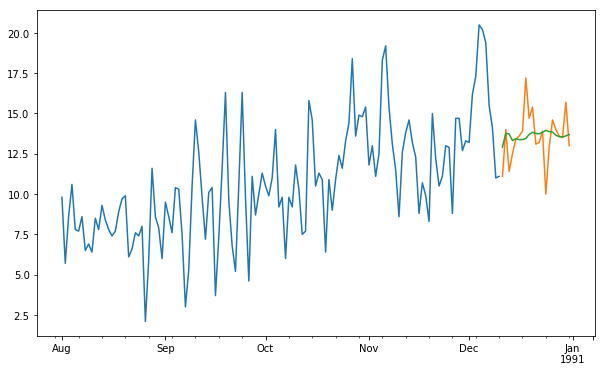

In [22]:
plt.figure(figsize=(10,6));
trainS.loc['1990-08':].plot()
testS.plot()
predictions.plot()
plt.show()

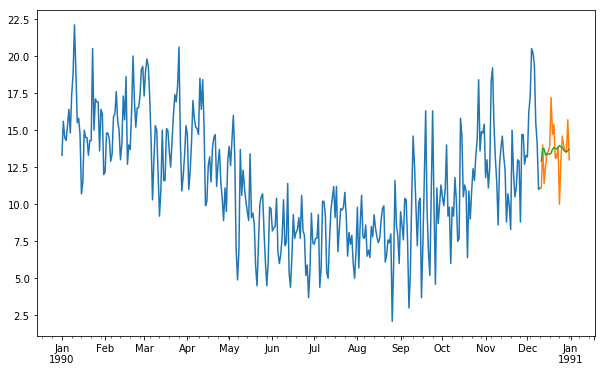

In [24]:
plt.figure(figsize=(10,6));
trainS.loc['1990':].plot()
testS.plot()
predictions.plot()
plt.show()

# Zadanie
Naucz model za każdym razem jak pojawi się nowy punkt.

In [25]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = AR(history)
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(history), end=(len(history)+1))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=12.913377, expected=11.100000
predicted=12.697805, expected=14.000000
predicted=14.030960, expected=11.400000
predicted=11.832803, expected=12.500000
predicted=13.109320, expected=13.400000
predicted=13.247412, expected=13.600000
predicted=13.350069, expected=13.900000
predicted=13.527543, expected=17.200000
predicted=15.772126, expected=14.700000
predicted=13.926384, expected=15.400000
predicted=14.740305, expected=13.100000
predicted=13.348273, expected=13.200000
predicted=13.793922, expected=13.900000
predicted=14.183527, expected=10.000000
predicted=11.716946, expected=12.900000
predicted=13.620489, expected=14.600000
predicted=14.131364, expected=14.000000
predicted=13.442986, expected=13.600000
predicted=13.327109, expected=13.500000
predicted=13.548457, expected=15.700000
predicted=14.747429, expected=13.000000


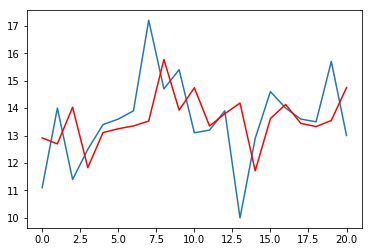

In [26]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [27]:
pre=pd.Series(predictions, index=testS.index)

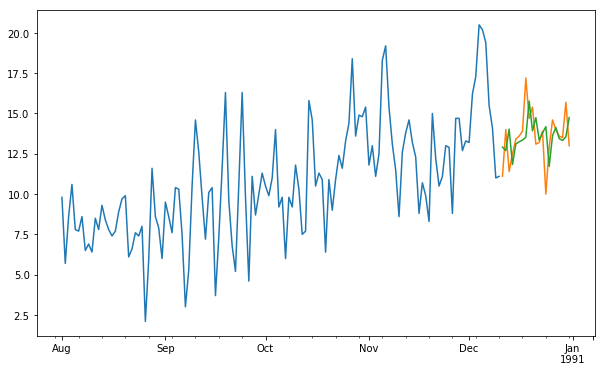

In [29]:
plt.figure(figsize=(10,6));
trainS.loc['1990-08':].plot()
testS.plot()
pre.plot()
plt.show()

# Zadanie
Nie ucz modelu za każdym razem ale wykorzystaj nowy punkt.

predicted=12.913377, expected=11.100000
predicted=12.701573, expected=14.000000
predicted=14.032635, expected=11.400000
predicted=11.837626, expected=12.500000
predicted=13.112759, expected=13.400000
predicted=13.249765, expected=13.600000
predicted=13.345710, expected=13.900000
predicted=13.528698, expected=17.200000
predicted=15.758677, expected=14.700000
predicted=13.919769, expected=15.400000
predicted=14.736588, expected=13.100000
predicted=13.336294, expected=13.200000
predicted=13.809436, expected=13.900000
predicted=14.184663, expected=10.000000
predicted=11.728095, expected=12.900000
predicted=13.632583, expected=14.600000
predicted=14.137192, expected=14.000000
predicted=13.437090, expected=13.600000
predicted=13.318013, expected=13.500000
predicted=13.536616, expected=15.700000
predicted=14.736493, expected=13.000000
Test MSE: 2.855


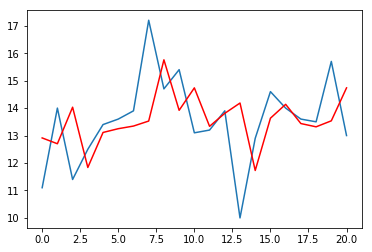

In [30]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

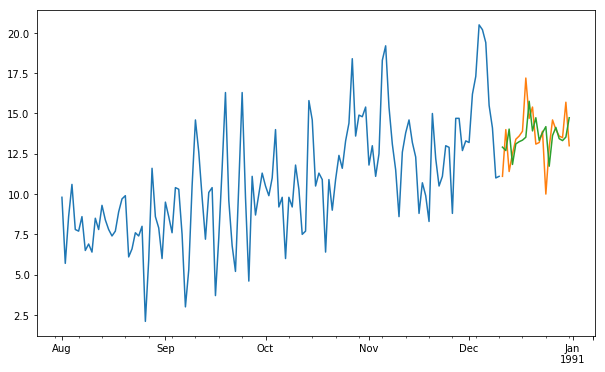

In [32]:
pre=pd.Series(predictions, index=testS.index)

plt.figure(figsize=(10,6));
trainS.loc['1990-08':].plot()
testS.plot()
pre.plot()
plt.show()